In [1]:
# Image Preprocessing: Bikes vs. Cars

#This notebook will load images from `images/Bikes/` and `images/Cars/`, split them into training and validation sets, normalize pixel values, optionally augment the training data, and cache/prefetch for performance.
import os
os.chdir("..")
print("Current working directory:", os.getcwd())
print("Contents:", os.listdir("."))


Current working directory: /Users/sheilamcgovern/Desktop/Projects2025/incremental_capstone_unit4
Contents: ['.DS_Store', 'images', '.gitignore', '.ipynb_checkpoints', 'venv', '.git', 'notebooks']


In [2]:

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  
import tensorflow as tf



# Parameters (re-define if not already set in an earlier cell)
IMG_HEIGHT = 128
IMG_WIDTH  = 128
BATCH_SIZE = 32
AUTOTUNE   = tf.data.AUTOTUNE

# 80% training, 20% validation from 'images/' directory
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "images",                
    labels="inferred",       
    label_mode="binary",     
    validation_split=0.2,    
    subset="training",      
    seed=123,                    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "images",
    labels="inferred",
    label_mode="binary",
    validation_split=0.2,
    subset="validation",     # this dataset = 20% validation
    seed=123,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Print out how many batches were created
print("Number of training batches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Number of validation batches:", tf.data.experimental.cardinality(val_ds).numpy())



Found 791 files belonging to 2 classes.
Using 633 files for training.
Found 791 files belonging to 2 classes.
Using 158 files for validation.
Number of training batches: 20
Number of validation batches: 5


In [4]:
# Cell 3: Normalize pixel values to [0..1]
normalization_layer = tf.keras.layers.Rescaling(1.0 / 255)

train_ds = train_ds.map(
    lambda x, y: (normalization_layer(x), y),
    num_parallel_calls=AUTOTUNE
)
val_ds = val_ds.map(
    lambda x, y: (normalization_layer(x), y),
    num_parallel_calls=AUTOTUNE
)



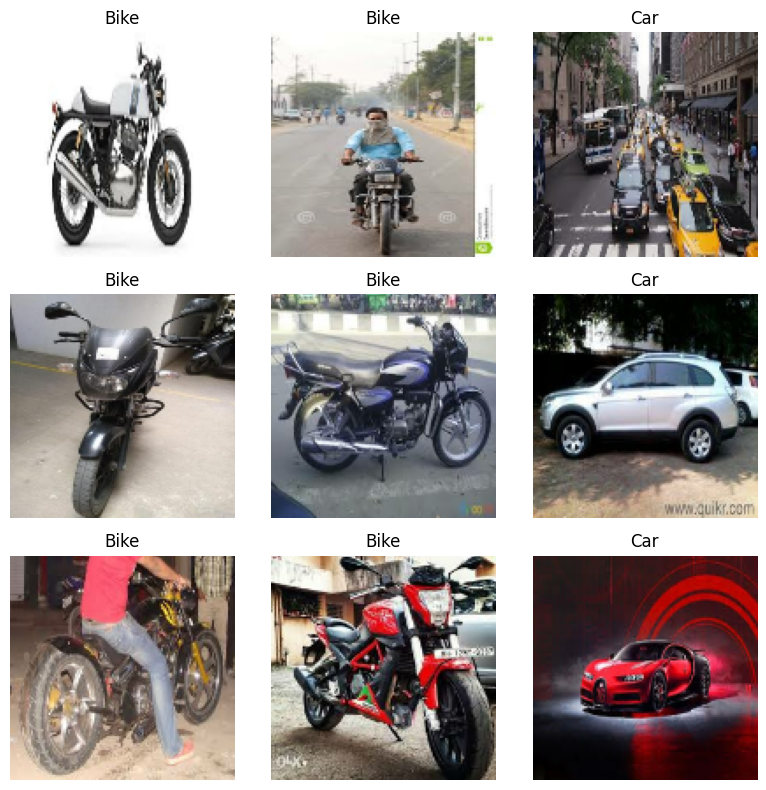

In [5]:
# Cell 4: Visualize a 3×3 grid (now with normalized images)
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(8, 8))
for image_batch, label_batch in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        img = image_batch[i].numpy()                  # Already in [0..1]
        plt.imshow(img)
        title = "Bike" if label_batch[i].numpy() == 0 else "Car"
        plt.title(title)
        plt.axis("off")
    break
plt.tight_layout()
plt.show()



In [6]:
# Cell 6: Cache & prefetch for performance
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds   = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
